In [17]:
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession

In [18]:
session = AsyncHTMLSession()

'<!DOCTYPE html><html lang="en-US" class="lang-en"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><script src="/cdn-cgi/challenge-platform/h/b/orchestrate/chl_page/v1?ray=7fc95fd2de2e6d6b"></script><script src="https://challenges.cloudflare.com/turnstile/v0/b/be88c2a1/api.js?onload=GuZZHB3&amp;render=explicit" async="" defer="" crossorigin="anonymous"></script></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><h1 class="zone-name-title h1"><img src="/favicon.ico" class="heading-favicon" alt="Icon for www.brickz.my">www.brickz.my</h1><h2 id="challenge-running" class="h2">Checking if the site connection is secure</h2><div id="challenge-stage"></div><div id="challenge-
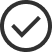

In [27]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
}
response = await session.get("https://www.brickz.my/transactions/residential/kuala-lumpur/page/" + str(1), headers=headers)
await response.html.arender()
response.html.html

In [12]:
html_soup = BeautifulSoup(response.content, 'html.parser')
html_soup

<!DOCTYPE html>
<html lang="en-US"><head><title>Just a moment...</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="noindex,nofollow" name="robots"/><meta content="width=device-width,initial-scale=1" name="viewport"/><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"/></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><noscript><div id="challenge-error-title"><div class="h2"><span class="icon-wrapper"><div class="heading-icon warning-icon"></div></span><span id="challenge-error-text">Enable JavaScript and cookies to continue</span></div></div></noscript></div></div><script>(function(){window._cf_chl_opt={cvId: '2',cZone: 'www.brickz.my',cType: 'managed',cNounce: '31479',cRay: '7fc92a93d9c06d6b',cHash: 'd6723622eb52592',cUPMDTk: "\/transactions\/residential\/kuala-lumpur\/page\/1?__cf_chl_tk=nTJgHvzAOFPuZi2XY3y4TspZ06XB.wp_B59gDXOGMF4-1693022410-

In [9]:
requests.get("https://www.google.com", headers=headers).content

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en-MY"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="YL4SkGXTTKUMyo4MChpcVg">(function(){var _g={kEI:\'XXnpZLfrHtS22roP37KImA0\',kEXPI:\'31\',kBL:\'66Ch\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'webhp\';google.kHL=\'en-MY\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}function r(a){/^http:/i.test(a)&&"https:"===window.location.protoc